In [733]:
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.datasets import make_blobs, make_classification

%matplotlib inline

from importlib import reload

import svm
import optimization
import oracles
reload(oracles)
reload(svm)
reload(optimization)

from svm import SVMSolver
from optimization import PEGASOSMethod, GDClassifier, SGDClassifier

In [37]:
import telepyth
%telepyth -t 3034105624885803499

Use token 3034105624885803499.


## Experiment 8

In [695]:
centers = np.array(
    [[1.0, 1.0], [5.0, 5.0], [9.0, 1.0],
     [1.0, 5.0], [5.0, 1.0], [9.0, 5.0]]
)
X, y = make_blobs(n_samples=300, centers=centers, cluster_std=0.5)
y[y < 3] = -1
y[y >= 3] = 1

In [723]:
clf = SVMSolver(method='dual', kernel='rbf', gamma=2.5, C=5000)
clf.fit(X, y)
mask = (clf.dual_variables >= 10 ** -6)

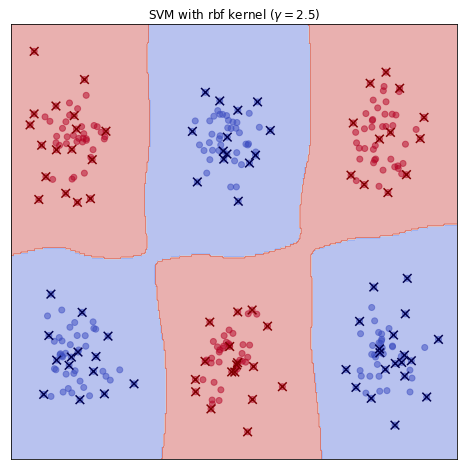

In [724]:
plt.figure(figsize=(8, 8))

h=0.03
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("SVM with rbf kernel ($\gamma=2.5$)")

plt.xticks([])
plt.yticks([])
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, cmap='coolwarm')
plt.scatter(X[mask][:, 0], X[mask][:, 1], c=y[mask], cmap='seismic', marker='x', s=75)
plt.savefig('experiment08_rbf_10.pdf', bbox_inches='tight')
plt.show()

In [698]:
clf = SVMSolver(method='dual', kernel='rbf', gamma=0.5, C=5000)
clf.fit(X, y)
mask = (clf.dual_variables >= 10 ** -6)

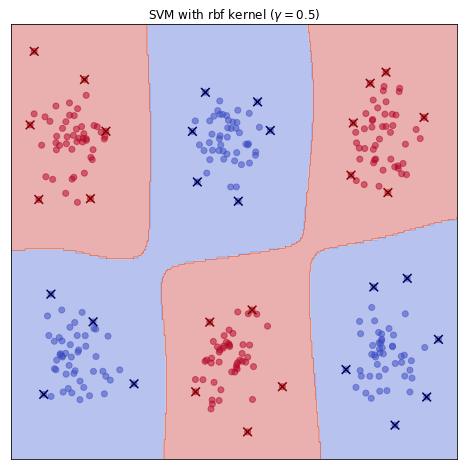

In [699]:
plt.figure(figsize=(8, 8))

h=0.03
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("SVM with rbf kernel ($\gamma=0.5$)")

plt.xticks([])
plt.yticks([])
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, cmap='coolwarm')
plt.scatter(X[mask][:, 0], X[mask][:, 1], c=y[mask], cmap='seismic', marker='x', s=75)
plt.savefig('experiment08_rbf_0_5.pdf', bbox_inches='tight')
plt.show()

In [717]:
clf = SVMSolver(method='dual', kernel='rbf', gamma=10, C=5000)
clf.fit(X, y)
mask = (clf.dual_variables >= 10 ** -6)

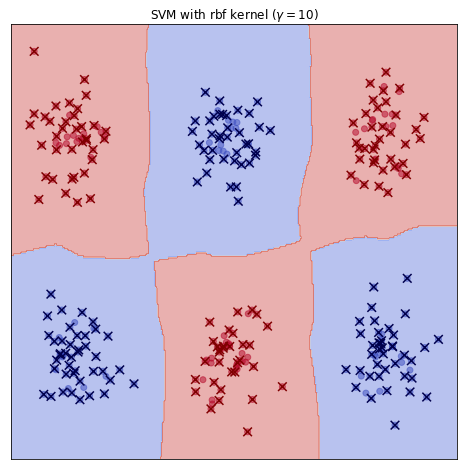

In [718]:
plt.figure(figsize=(8, 8))

h=0.03
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("SVM with rbf kernel ($\gamma=10$)")

plt.xticks([])
plt.yticks([])
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, cmap='coolwarm')
plt.scatter(X[mask][:, 0], X[mask][:, 1], c=y[mask], cmap='seismic', marker='x', s=75)
plt.savefig('experiment08_rbf_40.pdf', bbox_inches='tight')
plt.show()

In [712]:
clf = SVMSolver(method='dual', kernel='linear', C=50)
clf.fit(X, y)
mask = (clf.dual_variables >= 10 ** -6)

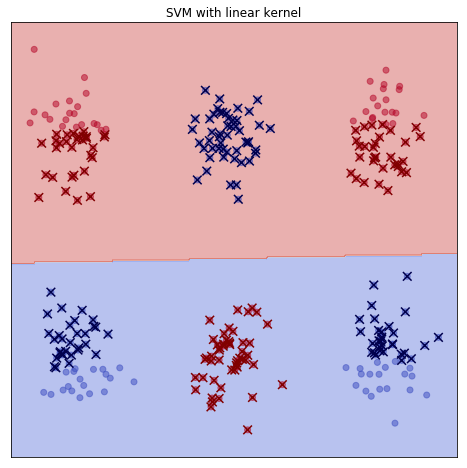

In [713]:
plt.figure(figsize=(8, 8))

h=0.03
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("SVM with linear kernel")

plt.xticks([])
plt.yticks([])
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, cmap='coolwarm')
plt.scatter(X[mask][:, 0], X[mask][:, 1], c=y[mask], cmap='seismic', marker='x', s=75)
plt.savefig('experiment08_linear.pdf', bbox_inches='tight')
plt.show()

## Experiment 1

Функции для генерации данных

In [252]:
def make_lin(n_samples):
    centers = np.array(
        [[1.0, 1.0], [1.0, 5.0],
         [5.0, 5.0], [5.0, 1.0]]
    )
    X_lin, y_lin = make_blobs(n_samples=n_samples, centers=centers, cluster_std=0.5)
    y_lin[y_lin < 2] = -1
    y_lin[y_lin >= 2] = 1
    return X_lin, y_lin

In [253]:
def make_nonlin(n_samples):
    centers = np.array(
        [[1.0, 1.0], [5.0, 5.0],
         [1.0, 5.0], [5.0, 1.0]]
    )
    X_nonlin, y_nonlin = make_blobs(n_samples=n_samples, centers=centers, cluster_std=0.5)
    y_nonlin[y_nonlin < 2] = -1
    y_nonlin[y_nonlin >= 2] = 1
    return X_nonlin, y_nonlin

In [254]:
def make_bad(n_samples):
    centers = np.array(
        [[1.0, 1.0], [3.0, 3.0],
         [1.0, 3.0], [3.0, 1.0]]
    )
    X_bad, y_bad = make_blobs(n_samples=n_samples, centers=centers, cluster_std=5)
    y_bad[y_bad < 2] = -1
    y_bad[y_bad >= 2] = 1
    return X_bad, y_bad

In [255]:
def make_imbalanced(n_samples):
    centers = np.array(
        [[1.0, 1.0], [5.0, 5.0],
         [1.0, 5.0], [5.0, 1.0]]
    )
    X_imbalanced, y_imbalanced = make_blobs(n_samples=n_samples, centers=centers, cluster_std=0.5)
    y_imbalanced[y_imbalanced < 3] = -1
    y_imbalanced[y_imbalanced >= 3] = 1
    return X_imbalanced, y_imbalanced

In [257]:
def make_outliers(n_samples, n_outliers):
    centers = np.array(
        [[1.0, 1.0], [5.0, 5.0],
         [1.0, 5.0], [5.0, 1.0]]
    )
    X_outliers_1, y_outliers_1 = make_blobs(n_samples=n_samples, centers=centers, cluster_std=0.5)
    y_outliers_1[y_outliers_1 < 2] = -1
    y_outliers_1[y_outliers_1 >= 2] = 1
    X_outliers_2, y_outliers_2 = make_blobs(n_samples=n_outliers, centers=centers, cluster_std=0.5)
    y_outliers_2[y_outliers_2 < 2] = 1
    y_outliers_2[y_outliers_2 >= 2] = -1
    X_outliers = np.vstack((X_outliers_1, X_outliers_2))
    y_outliers = np.r_[y_outliers_1, y_outliers_2]
    return X_outliers, y_outliers

Эксперимент

In [561]:
num_samples = [500, 1000, 2000, 5000]

In [647]:
classifiers = [
    SVMSolver(method='primal', kernel='linear', C=1),
    SVMSolver(method='dual', kernel='linear', C=1),
    SVMSolver(method='dual', kernel='polynomial', C=1, degree=3),
    SVMSolver(method='dual', kernel='rbf', C=1, gamma=2),
    PEGASOSMethod(num_iter=10000, batch_size=100),
    GDClassifier(max_iter=10000, step_beta=0.5),
    SGDClassifier(max_iter=10000, batch_size=50, step_beta=0.5)
]

names = [
    'primal linear',
    'dual linear',
    'dual polynomial',
    'dual rbf',
    'pegasos',
    'GD',
    'SGD'
]

In [648]:
for num in num_samples:
    X, y = make_classification(n_samples=num, n_features=200, class_sep=0.5)
    X_cf = np.hstack((np.ones(X.shape[0])[:, np.newaxis], X))
    y[y == 0] = -1
    for clf, name in zip(classifiers, names):
        start_time = time.time()
        if name in ['primal linear', 'dual linear', 'dual polynomial', 'dual rbf']:
            clf.fit(X, y)
            loss = clf.get_objective(X, y)
        else:
            clf.fit(X_cf, y)
            loss = clf.get_objective(X_cf, y)
        print("num: {}\tclf: {}\t\ntime: {:.2f} s\tfunc: {}\n".format(num, name, time.time() - start_time, loss))

num: 500	clf: primal linear	
time: 0.26 s	func: 0.7265849508247053

num: 500	clf: dual linear	
time: 0.15 s	func: -0.7265848240911535

num: 500	clf: dual polynomial	
time: 0.11 s	func: -3.2272454223920634e-05

num: 500	clf: dual rbf	
time: 0.53 s	func: -0.9910158638076437

num: 500	clf: pegasos	
time: 1.13 s	func: 0.7267242723362568

num: 500	clf: GD	
time: 2.31 s	func: 1.026635416381475

num: 500	clf: SGD	
time: 0.61 s	func: 0.8000537973762623

num: 1000	clf: primal linear	
time: 1.61 s	func: 0.7869914608489608

num: 1000	clf: dual linear	
time: 1.10 s	func: -0.7869913377968099

num: 1000	clf: dual polynomial	
time: 0.67 s	func: -6.575003661998458e-05

num: 1000	clf: dual rbf	
time: 2.50 s	func: -0.9915079297377766

num: 1000	clf: pegasos	
time: 1.12 s	func: 0.7874442823047425

num: 1000	clf: GD	
time: 5.62 s	func: 0.9044726471391438

num: 1000	clf: SGD	
time: 0.55 s	func: 0.9007288665106112

num: 2000	clf: primal linear	
time: 7.92 s	func: 0.8374535791085669

num: 2000	clf: dual line

In [649]:
num_features = [100, 200, 500, 1000]

In [650]:
for num in num_features:
    X, y = make_classification(n_samples=2000, n_features=num, class_sep=0.5)
    y[y == 0] = -1
    for clf, name in zip(classifiers, names):
        start_time = time.time()
        clf.fit(X, y)
        print("num: {}\tclf: {}\t\ntime: {:.2f} s\tfunc: {}\n".format(num, name, time.time() - start_time, clf.get_objective(X, y)))

num: 100	clf: primal linear	
time: 7.28 s	func: 0.8320868953491398

num: 100	clf: dual linear	
time: 7.08 s	func: -0.8320867526611773

num: 100	clf: dual polynomial	
time: 5.37 s	func: -0.0010767389392066853

num: 100	clf: dual rbf	
time: 20.61 s	func: -0.9987504756964292

num: 100	clf: pegasos	
time: 0.76 s	func: 0.8326167473589907

num: 100	clf: GD	
time: 7.30 s	func: 0.8411669922675604

num: 100	clf: SGD	
time: 0.44 s	func: 0.9477257696725898

num: 200	clf: primal linear	
time: 8.14 s	func: 0.7928154343827707

num: 200	clf: dual linear	
time: 6.95 s	func: -0.7928153583495186

num: 200	clf: dual polynomial	
time: 3.35 s	func: -0.00012723179564495265

num: 200	clf: dual rbf	
time: 10.95 s	func: -0.9967514608231599

num: 200	clf: pegasos	
time: 1.26 s	func: 0.793493905546588

num: 200	clf: GD	
time: 0.22 s	func: 0.5034626315113597

num: 200	clf: SGD	
time: 0.55 s	func: 0.6453739831285046

num: 500	clf: primal linear	
time: 11.32 s	func: 0.7161373040657703

num: 500	clf: dual linear	
ti

---

In [804]:
X, y = make_classification(n_samples=2000, n_features=20, class_sep=0.5)

In [805]:
histories = []

In [806]:
for clf in classifiers:
    histories.append(clf.fit(X, y, trace=True))

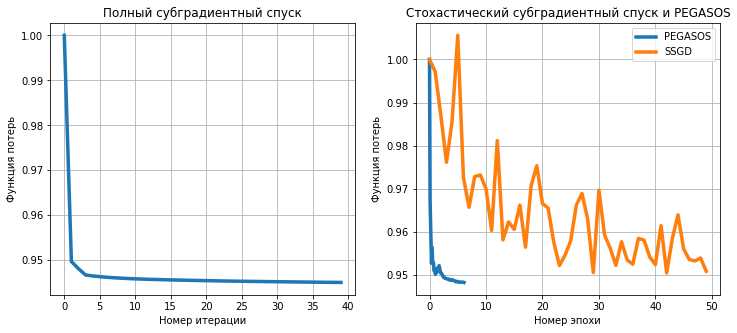

In [807]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(histories[1]['func'][:40], linewidth=3.5)
ax1.set_title("Полный субградиентный спуск")
ax1.set_xlabel("Номер итерации")
ax1.set_ylabel("Функция потерь")
#ax1.set_ylim(0.18, 0.72)
ax1.grid()

ax2.plot(histories[0]['epoch_num'][:50], histories[0]['func'][:50], linewidth=3.5, label='PEGASOS')
ax2.plot(histories[2]['epoch_num'][:50], histories[2]['func'][:50], linewidth=3.5, label='SSGD')
ax2.set_title("Стохастический субградиентный спуск и PEGASOS")
ax2.set_xlabel("Номер эпохи")
ax2.set_ylabel("Функция потерь")
ax2.legend()
#ax2.set_ylim(0.18, 0.72)
ax2.grid()

plt.savefig("exp1_speed.pdf")
plt.show()

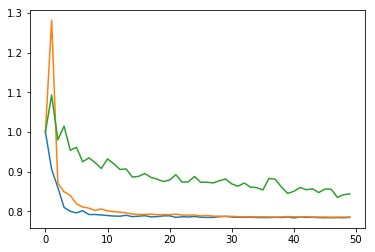

## Experiment 4

In [651]:
from sklearn.cross_validation import KFold

In [652]:
def accuracy(y_test, y_pred):
    return (y_test == y_pred).sum() / len(y_test)

In [658]:
X, y = make_classification(n_clusters_per_class=1, n_samples=100, class_sep=1, n_features=2, n_informative=2, n_redundant=0, n_repeated=0)
y[y == 0] = -1

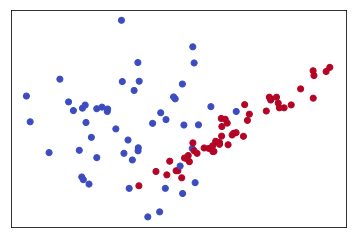

In [685]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.xticks([])
plt.yticks([])
plt.savefig('experiment04_set.pdf', bbox_inches='tight')

In [660]:
folds = KFold(n=100, n_folds=3, shuffle=True)

In [661]:
C_params = [1, 5, 10, 25, 100]

In [662]:
for C in C_params:
    clf = SVMSolver(method='dual', kernel='linear', C=C)
    scores = []
    for train_indices, test_indices in folds:
        clf.fit(X[train_indices], y[train_indices])
        y_pred = clf.predict(X[test_indices])
        scores.append(accuracy(y[test_indices], y_pred))
        
    print("{}: {}".format(C, np.array(scores).mean()))

1: 0.7694592988710635
5: 0.8894830659536542
10: 0.8796791443850268
25: 0.7700534759358288
100: 0.7602495543672014


In [689]:
degrees = [2, 3, 4, 5, 6, 7]

In [690]:
for degree in degrees:
    clf = SVMSolver(method='dual', kernel='polynomial', C=5, degree=degree)
    scores = []
    for train_indices, test_indices in folds:
        clf.fit(X[train_indices], y[train_indices])
        y_pred = clf.predict(X[test_indices])
        scores.append(accuracy(y[test_indices], y_pred))
        
    print("{}: {}".format(degree, np.array(scores).mean()))

2: 0.8594771241830066
3: 0.7703505644682115
4: 0.8704693998811646
5: 0.8303624480095069
6: 0.8603683897801545
7: 0.8502673796791443


In [687]:
gammas = [1, 10, 25, 50, 100]

In [679]:
for gamma in gammas:
    clf = SVMSolver(method='dual', kernel='rbf', C=5, gamma=gamma)
    scores = []
    for train_indices, test_indices in folds:
        clf.fit(X[train_indices], y[train_indices])
        y_pred = clf.predict(X[test_indices])
        scores.append(accuracy(y[test_indices], y_pred))
        
    print("{}: {}".format(gamma, np.array(scores).mean()))

1: 0.8995840760546643
10: 0.9099821746880571
25: 0.9298871063576946
50: 0.8995840760546643
100: 0.8897801544860369


In [692]:
X, y = make_lin(100)

In [694]:
for C in C_params:
    clf = SVMSolver(method='dual', kernel='linear', C=C)
    scores = []
    for train_indices, test_indices in folds:
        clf.fit(X[train_indices], y[train_indices])
        y_pred = clf.predict(X[test_indices])
        scores.append(accuracy(y[test_indices], y_pred))
        
    print("{}: {}".format(C, np.array(scores).mean()))

1: 1.0
5: 1.0
10: 1.0
25: 1.0
100: 1.0
